In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report , roc_auc_score , accuracy_score

import joblib

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
print(f"(Rows, Columns) : {df.shape}")

(Rows, Columns) : (30000, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
print(f"The number of null terms in the dataset are :\n{df.isnull().sum()}")

The number of null terms in the dataset are :
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [7]:
print(f"The Columns in the dataset are : \n{df.columns}")

The Columns in the dataset are : 
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [8]:
df.rename(columns={'default.payment.next.month' : 'default'} , inplace =True)

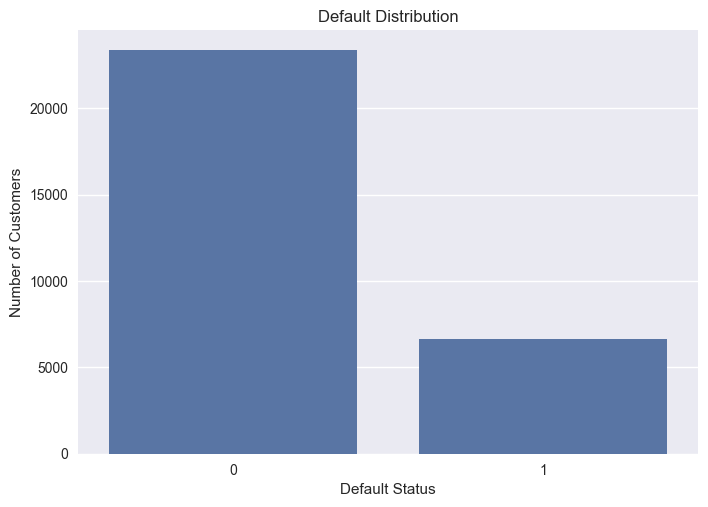

In [9]:
sns.countplot(x='default', data =df)
plt.title('Default Distribution')
plt.ylabel("Number of Customers")
plt.xlabel("Default Status")
plt.show()

In [10]:
df['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

## Understanding Categorical Variable Encodings

The categorical variables in this dataset (`SEX`, `EDUCATION`, and `MARRIAGE`) are encoded as numeric values.  
 **Dataset Documentation provided on Kaggle**.

**SEX**
| 1 | Male |
| 2 | Female |

**EDUCATION**
| 1 | Graduate School |
| 2 | University |
| 3 | High School |
| 4 | Others |
| 5 | Unknown |
| 6 | Unknown |
| 0 | Unknown |

**MARRIAGE**
| 1 | Married |
| 2 | Single |
| 3 | Others |
| 0 | Unknown |

In [11]:
cat_cols = ['SEX' , 'EDUCATION' , 'MARRIAGE']
for col in cat_cols:
    print(f"{col} unique values:")
    print(df[col].value_counts())
    print("-" * 40)


SEX unique values:
SEX
2    18112
1    11888
Name: count, dtype: int64
----------------------------------------
EDUCATION unique values:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
----------------------------------------
MARRIAGE unique values:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
----------------------------------------


In [12]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [13]:
df['avg_bill_amt'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
df['avg_pay_amt'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)


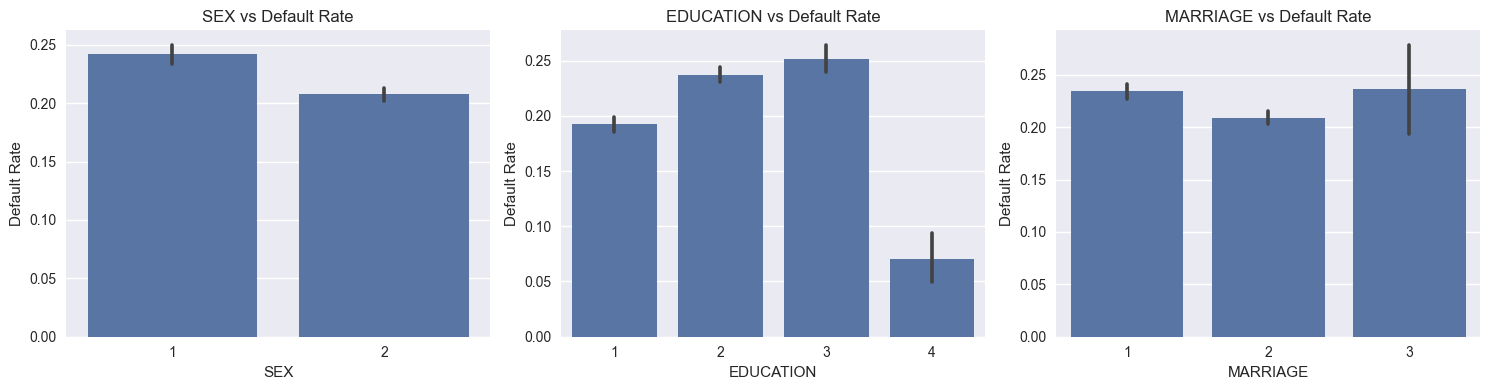

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, cat_cols):
    sns.barplot(x=col, y='default', data=df, ax=ax)
    ax.set_title(f"{col} vs Default Rate")
    ax.set_xlabel(col)
    ax.set_ylabel("Default Rate")

plt.tight_layout()
plt.show()

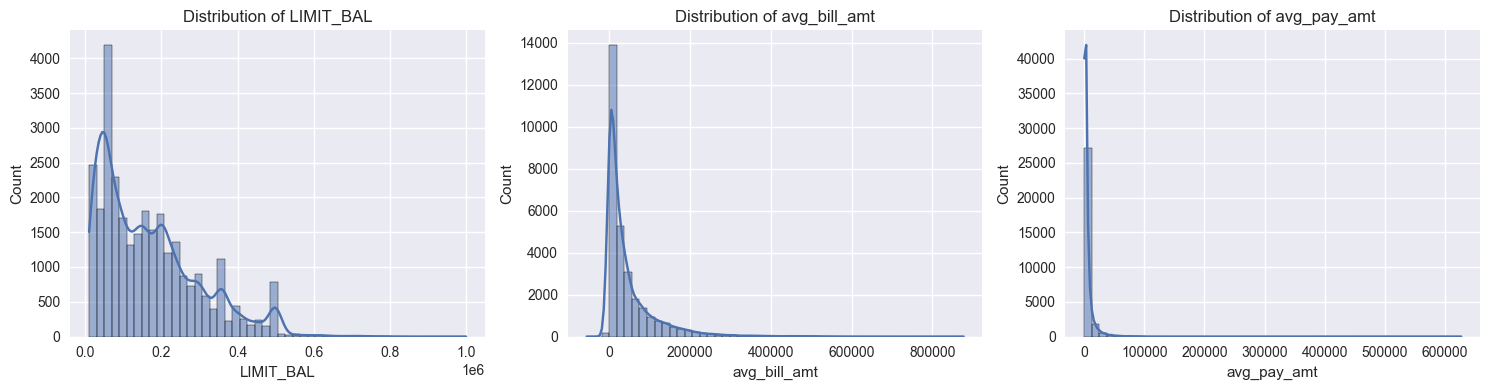

In [15]:
num_cols = ['LIMIT_BAL', 'avg_bill_amt', 'avg_pay_amt']
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], bins = 50, kde = True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

The distributions of LIMIT_BAL, BILL_AMT1, and PAY_AMT1 are highly right-skewed with long tails and extreme values. Most customers have relatively small balances and payments, while a few have very large amounts. To reduce the impact of outliers and improve model stability, log transformations are applied to these features.


In [16]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_cols].head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [17]:
df[pay_cols].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [18]:
df['late_payment_count'] = (df[pay_cols] > 0).sum(axis=1)
df['max_delay'] = df[pay_cols].max(axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_bill_amt,avg_pay_amt,late_payment_count,max_delay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,1284.000000,114.833333,2,2
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,2846.166667,833.333333,2,2
2,3,90000.0,2,2,2,34,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,16942.166667,1836.333333,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,38555.666667,1398.000000,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,18223.166667,9841.500000,0,0


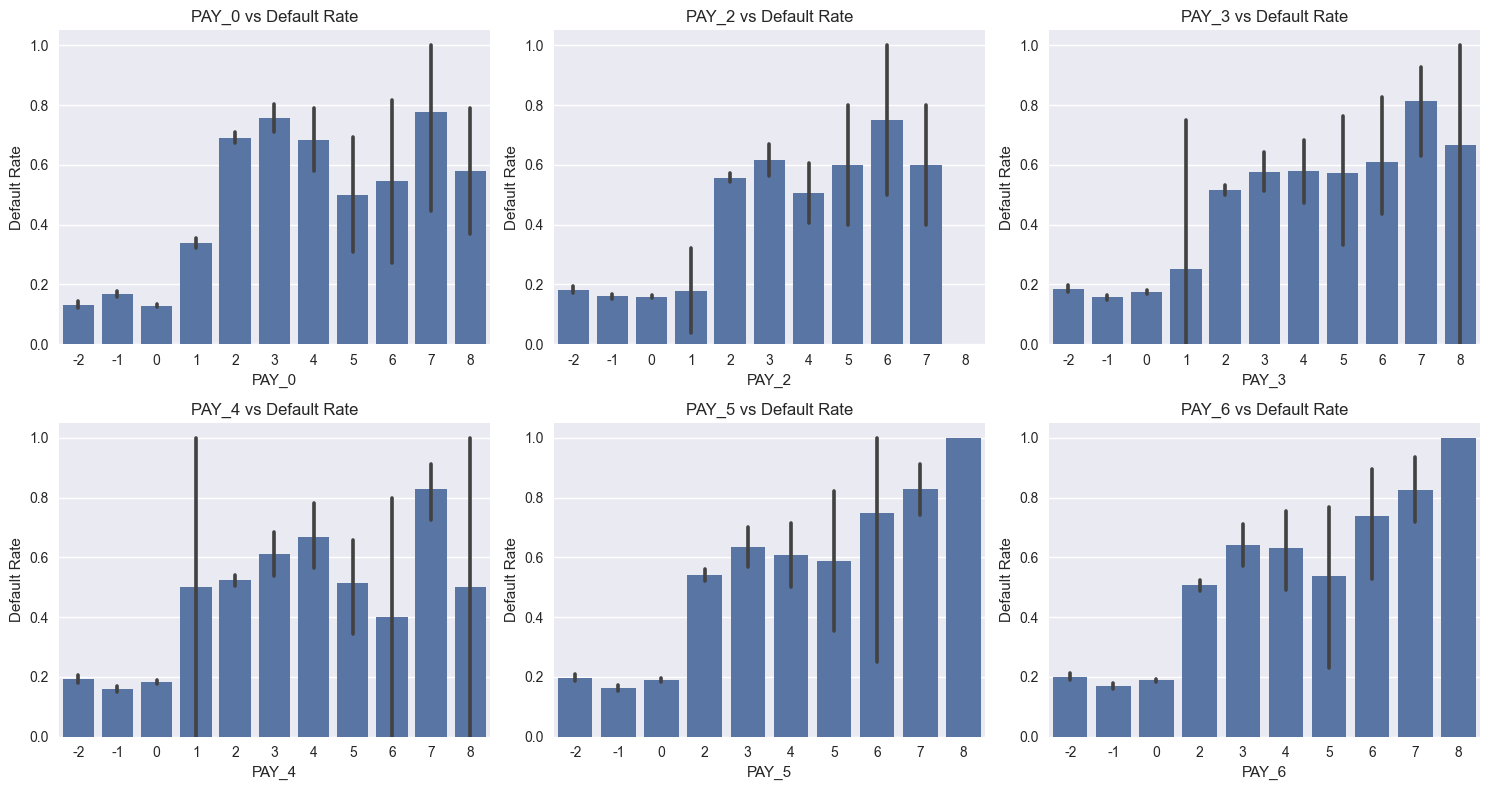

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, pay_cols):
    sns.barplot(x=col, y='default', data=df, ax=ax)
    ax.set_title(f"{col} vs Default Rate")
    ax.set_xlabel(col)
    ax.set_ylabel("Default Rate")

plt.tight_layout()
plt.show()

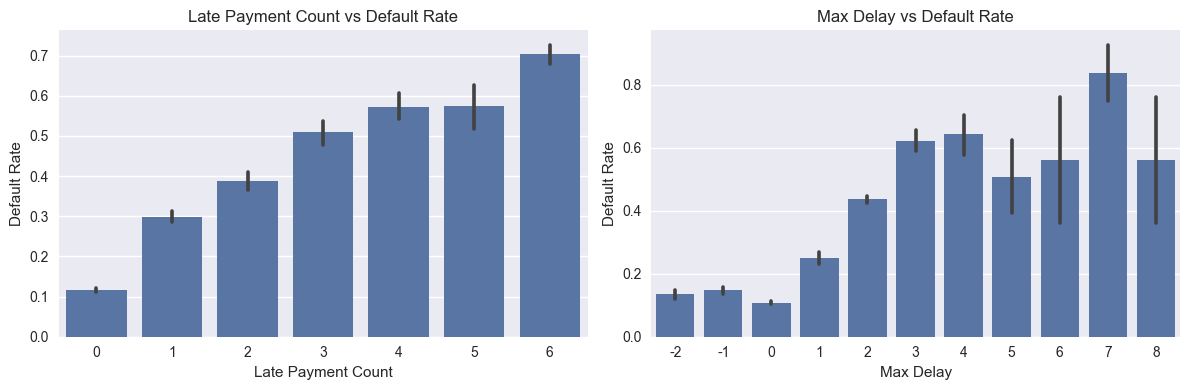

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x= 'late_payment_count', y= 'default', data=df, ax=axes[0])
axes[0].set_title("Late Payment Count vs Default Rate")
axes[0].set_xlabel("Late Payment Count")
axes[0].set_ylabel("Default Rate")

sns.barplot(x='max_delay', y='default', data=df, ax=axes[1])
axes[1].set_title("Max Delay vs Default Rate")
axes[1].set_xlabel("Max Delay")
axes[1].set_ylabel("Default Rate")

plt.tight_layout()
plt.show()

**Late Payment Count:**
Default rate increases monotonically as the number of late payments increases.

**Max Delay:**
Customers with higher maximum delay show significantly higher default risk.

In [21]:
df['log_limit_bal'] = np.log1p(df['LIMIT_BAL'])
df['log_bill_amt_avg'] = np.log1p(df['avg_bill_amt'].clip(lower=0))
df['log_pay_amt_avg'] = np.log1p(df['avg_pay_amt'].clip(lower=0))

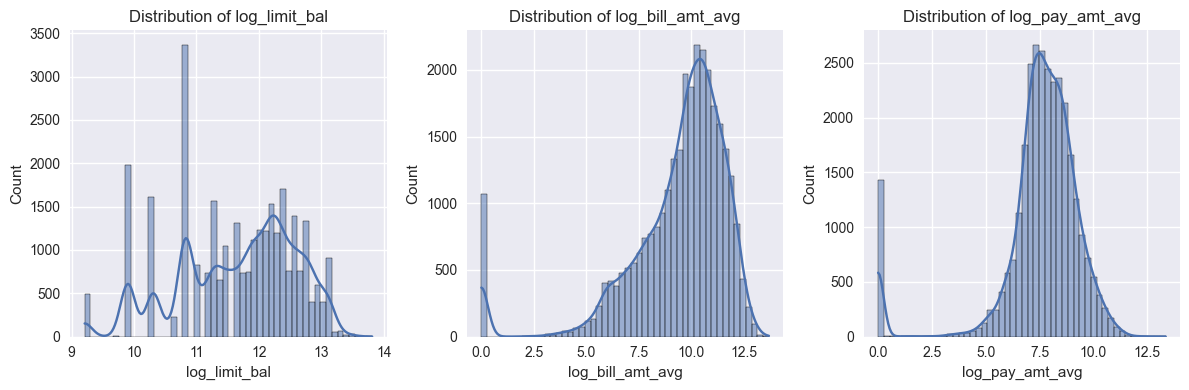

In [22]:
log_cols = ['log_limit_bal', 'log_bill_amt_avg', 'log_pay_amt_avg']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axes, log_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

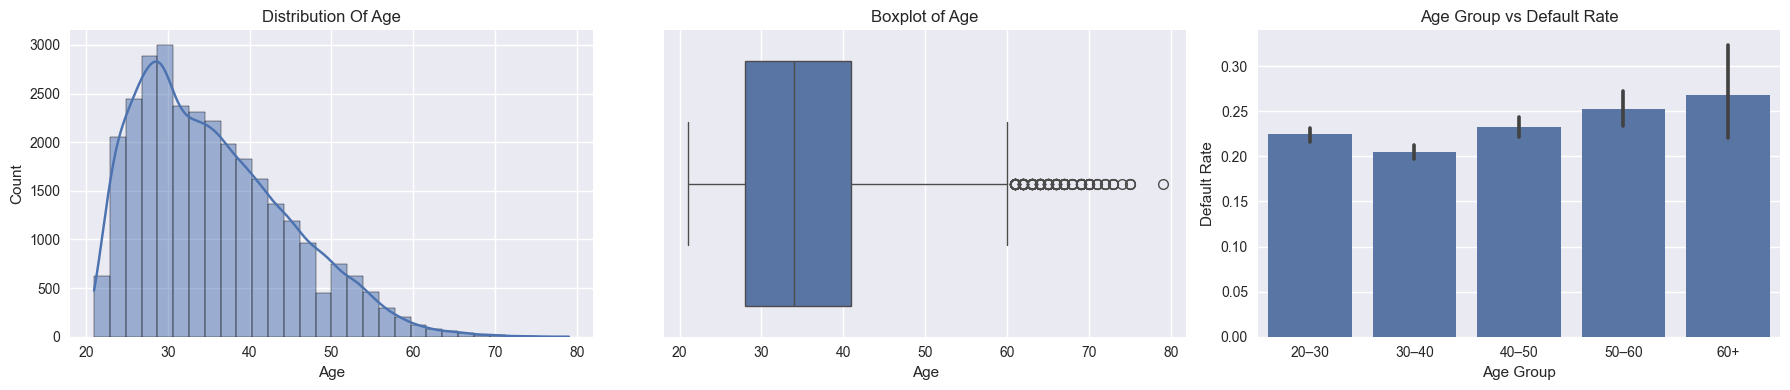

In [23]:
fig , axes= plt.subplots(1, 3, figsize=(18,4))
sns.histplot(df['AGE'], bins=30, kde= True, ax=axes[0])
axes[0].set_title('Distribution Of Age')
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

sns.boxplot(x=df['AGE'], ax=axes[1])
axes[1].set_title("Boxplot of Age")
axes[1].set_xlabel("Age")

df['AGE_BIN'] = pd.cut(
    df['AGE'],
    bins=[20, 30, 40, 50, 60, 80],
    labels=['20–30', '30–40', '40–50', '50–60', '60+']
)

sns.barplot(x='AGE_BIN', y='default', data=df, ax=axes[2])
axes[2].set_title("Age Group vs Default Rate")
axes[2].set_xlabel("Age Group")
axes[2].set_ylabel("Default Rate")

plt.tight_layout()
plt.show()

### Age Feature – Key EDA Insights

1. The age distribution is approximately normal, with most customers falling between 25 and 50 years, indicating no need for transformation.

2. Although a few higher-age outliers are present, they represent valid customer records and were retained in the dataset.

3. Default rates vary across age groups, with younger customers showing slightly higher default risk, confirming age as a meaningful predictive feature.


In [24]:
df_model = df.drop(columns=['AGE_BIN'])

In [25]:
feature_cols = ['SEX','EDUCATION','MARRIAGE','AGE','log_limit_bal','log_bill_amt_avg','log_pay_amt_avg','late_payment_count','max_delay']
X = df_model[feature_cols]
y = df_model['default']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [26]:
#Scaling the data
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
#Training the model
log_reg = LogisticRegression(max_iter=1000, class_weight = 'balanced', random_state= 42)
log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [28]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]

In [29]:
print(f"The accuracy score of the model is: {accuracy_score( y_test, y_pred)}")

The accuracy score of the model is: 0.7411666666666666


In [30]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4673
           1       0.44      0.60      0.51      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.74      0.75      6000



In [31]:
confusion_matrix( y_test, y_pred)

array([[3649, 1024],
       [ 529,  798]])

In [32]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7474028276728326


## 🔄 Project Workflow

1. **Problem Understanding**  
   I started by understanding the business objective: predicting whether a credit card customer will default on their payment. Since this is a high-risk financial problem, I focused on identifying defaulters accurately rather than maximizing overall accuracy.

2. **Data Exploration and Cleaning**  
   I explored the dataset to understand feature distributions, target imbalance, and data quality issues. I identified that the target variable was imbalanced and that several categorical variables contained invalid or rare categories, which I cleaned based on dataset documentation.

3. **Exploratory Data Analysis (EDA)**  
   I performed detailed EDA on both categorical and numerical features using histograms, boxplots, and bar plots. This helped me identify strong skewness in financial variables, outliers, and meaningful relationships between features and the target variable.

4. **Feature Engineering**  
   To reduce skewness and stabilize variance, I applied log transformations to financial variables. I aggregated monthly bill and payment amounts using their mean to reduce multicollinearity. Additionally, I engineered behavioral features such as late payment count and maximum payment delay to better capture customer repayment behavior.

5. **Feature Selection**  
   I removed redundant and highly correlated raw features, keeping only the engineered, interpretable variables that contributed meaningful information to the model.

6. **Data Preparation**  
   I split the data into training and test sets using stratification to preserve class distribution. Feature scaling was applied using standardization to prepare the data for Logistic Regression.

7. **Model Training**  
   I trained a baseline Logistic Regression model and observed that, although accuracy was reasonable, recall for defaulters was low due to class imbalance. To address this, I retrained the model using `class_weight='balanced'`.

8. **Model Evaluation**  
   I evaluated the model using appropriate metrics such as recall, confusion matrix, and ROC-AUC instead of relying solely on accuracy. The balanced model significantly improved recall for defaulters while maintaining a stable ROC-AUC score.

9. **Final Model Selection**  
   I selected the balanced Logistic Regression model as the final model because it aligns better with business objectives by reducing the risk of missing defaulters, even at the cost of slightly lower accuracy.

In [33]:
joblib.dump(log_reg , "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [34]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [35]:
joblib.dump( feature_cols, "model_features.pkl")

['model_features.pkl']